## Employee Satisfaction Scores

In [4]:
import pandas as pd
import os

# List of CSV file names as per the provided ticker list
file_names = [
    'ABB.csv', 'ADANI GROUP.CSV', 'ADANIPORTS.csv', 'ADANIPOWER.csv', 'AMBUJACEM.csv', 'ASIANPAINT.csv',
    'AXISBANK.csv', 'BAJAJ-AUTO.csv', 'BAJFINANCE.csv', 'BANKBARODA.csv', 'BEL.csv', 'BERGEPAINT.csv', 
    'BHARTIARTL.csv', 'BPCL.csv', 'BRITANNIA.csv', 'CANBK.csv', 'CHOLAFIN.csv', 'CIPLA.csv', 'COALINDIA.csv',
    'DABUR.csv', 'DIVISLAB.csv', 'DLF.csv', 'DRREDDY.csv', 'EICHERMOT.csv', 'GAIL.csv', 'GODREJCP.csv', 
    'GRASIM.csv', 'HAL.csv', 'HAVELLS.csv', 'HCLTECH.csv', 'HDFCBANK.csv', 'HDFCLIFE.csv', 'HEROMOTOCO.csv',
    'HINDALCO.csv', 'HINDUNILVR.csv', 'ICICIBANK.csv', 'ICICIGI.csv', 'ICICIPRULI.csv', 'INDIGO.csv', 
    'INDUSINDBK.csv', 'INFY.csv', 'IOC.csv', 'ITC.csv', 'JINDALSTEL.csv', 'JSWSTEEL.csv', 'KOTAKBANK.csv', 
    'LICI.csv', 'LT.csv', 'LTIM.csv', 'M&M.csv', 'MARICO.csv', 'MARUTI.csv', 'MCDOWELL-N.csv', 'NAUKRI.csv', 
    'NESTLEIND.csv', 'NTPC.csv', 'ONGC.csv', 'PFC.csv', 'PIDILITIND.csv', 'PNB.csv', 'POWERGRID.csv', 
    'RECLTD.csv', 'RELIANCE.csv', 'SBI.csv', 'SBICARD.csv', 'SBILIFE.csv', 'SHREECEM.csv', 'SIEMENS.csv', 
    'SRF.csv', 'SUNPHARMA.csv', 'TATACONSUM.csv', 'TATAMOTORS.csv', 'TATAPOWER.csv', 'TATASTEEL.csv', 
    'TECHM.csv', 'TITAN.csv', 'TORNTPHARM.csv', 'TVSMOTOR.csv', 'ULTRACEMCO.csv', 'VBL.csv', 'VEDANTA.csv',
    'WIPRO.csv', 'ZOMATO.csv', 'ZYDUSLIFE.csv'
]

# Create an empty list to store the results
company_scores = []

# Define the function to calculate employee satisfaction score
def calculate_satisfaction_score(positive_reviews, total_reviews):
    if total_reviews == 0:
        return 0  # Handle division by zero if no reviews
    # Calculate percentage of positive reviews
    positive_percentage = (positive_reviews / total_reviews) * 100
    # Convert percentage to a score out of 10
    satisfaction_score = positive_percentage / 10
    return round(satisfaction_score, 2)

# Process each file, using the first column of data for reviews
for file_name in file_names:
    try:
        # Load the CSV file into a pandas DataFrame
        df = pd.read_csv(file_name, low_memory=False)

        # Use the first column in the file as the reviews, and try to convert to numeric
        first_column = pd.to_numeric(df.iloc[:, 0], errors='coerce')

        # Drop rows where the first column is not a valid number (NaN)
        first_column = first_column.dropna()

        # Check if the company has more than 100 reviews
        total_reviews = first_column.count()

        if total_reviews >= 100:
            # Calculate positive reviews (reviews with a score of 4 or 5)
            positive_reviews = first_column[first_column >= 4].count()
            
            # Calculate the employee satisfaction score
            employee_satisfaction_score = calculate_satisfaction_score(positive_reviews, total_reviews)
            
            # Append the result for this company
            company_scores.append({
                'Company': file_name.replace('.csv', ''),  # Remove '.csv' from the file name
                'Total_Reviews': total_reviews,
                'Positive_Reviews': positive_reviews,
                'Employee_Satisfaction_Score': employee_satisfaction_score
            })
    except Exception as e:
        print(f"Error in file {file_name}: {e}")

# Convert the results list into a DataFrame
company_scores_df = pd.DataFrame(company_scores)

# Sort the companies based on Employee Satisfaction Score in descending order
top_50_companies = company_scores_df.sort_values(by='Employee_Satisfaction_Score', ascending=False).head(50)

# Save the top 50 companies to a new CSV file
top_50_companies.to_csv('top_50_companies_satisfaction_1.csv', index=False)

print("Top 50 companies based on employee satisfaction score have been saved to 'top_50_companies_satisfaction.csv'.")


Top 50 companies based on employee satisfaction score have been saved to 'top_50_companies_satisfaction.csv'.


## Portfolio Weight distribution ( Exponential Method )

In [6]:
import pandas as pd
import numpy as np

# Load the CSV file with employee satisfaction scores
satisfaction_data = pd.read_csv('top_50_companies_satisfaction_1.csv')

# Sort data by Employee Satisfaction Score in descending order
satisfaction_data = satisfaction_data.sort_values(by='Employee_Satisfaction_Score', ascending=False).reset_index(drop=True)

# Apply exponential weighting
decay_rate = 0.9  # Adjust this value to control the decay rate; values closer to 1 decrease slower, giving more weight to higher scores

# Calculate exponential weights based on the index (rank)
satisfaction_data['Exponential_Weight'] = decay_rate ** satisfaction_data.index

# Normalize weights to sum to 100
satisfaction_data['Weight'] = (satisfaction_data['Exponential_Weight'] / satisfaction_data['Exponential_Weight'].sum()) * 100

# Ensure no stock has more than a 10% allocation
excess_allocation = satisfaction_data[satisfaction_data['Weight'] > 10]['Weight'].sum() - 10 * len(satisfaction_data[satisfaction_data['Weight'] > 10])
satisfaction_data.loc[satisfaction_data['Weight'] > 10, 'Weight'] = 10

# Redistribute the excess allocation to stocks with less than 10% weight
remaining_weights = satisfaction_data[satisfaction_data['Weight'] < 10]['Weight']
remaining_total = remaining_weights.sum()
satisfaction_data.loc[satisfaction_data['Weight'] < 10, 'Weight'] += (remaining_weights / remaining_total) * excess_allocation

# Drop the auxiliary column 'Exponential_Weight' after normalization
satisfaction_data = satisfaction_data.drop(columns=['Exponential_Weight'])

# Print the updated DataFrame with custom weights
print("Portfolio Weights based on Employee Satisfaction Scores (Exponential with Max 10% Cap):")
print(satisfaction_data[['Company', 'Employee_Satisfaction_Score', 'Weight']])

# Verify if the weights sum to 100%
print("\nTotal Portfolio Weight:", satisfaction_data['Weight'].sum())


Portfolio Weights based on Employee Satisfaction Scores (Exponential with Max 10% Cap):
       Company  Employee_Satisfaction_Score     Weight
0         GAIL                         8.61  10.000000
1         ONGC                         8.10   9.051835
2   HINDUNILVR                         7.97   8.146651
3         LICI                         7.93   7.331986
4        TITAN                         7.86   6.598787
5      SIEMENS                         7.83   5.938909
6   ICICIPRULI                         7.80   5.345018
7    ZYDUSLIFE                         7.77   4.810516
8    POWERGRID                         7.76   4.329464
9    EICHERMOT                         7.72   3.896518
10        NTPC                         7.64   3.506866
11  PIDILITIND                         7.58   3.156180
12         IOC                         7.47   2.840562
13  HEROMOTOCO                         7.42   2.556505
14      MARICO                         7.41   2.300855
15         SRF                  

## Comparison with Benchmark (Nifty 50)

[*********************100%%**********************]  50 of 50 completed
[*********************100%%**********************]  1 of 1 completed


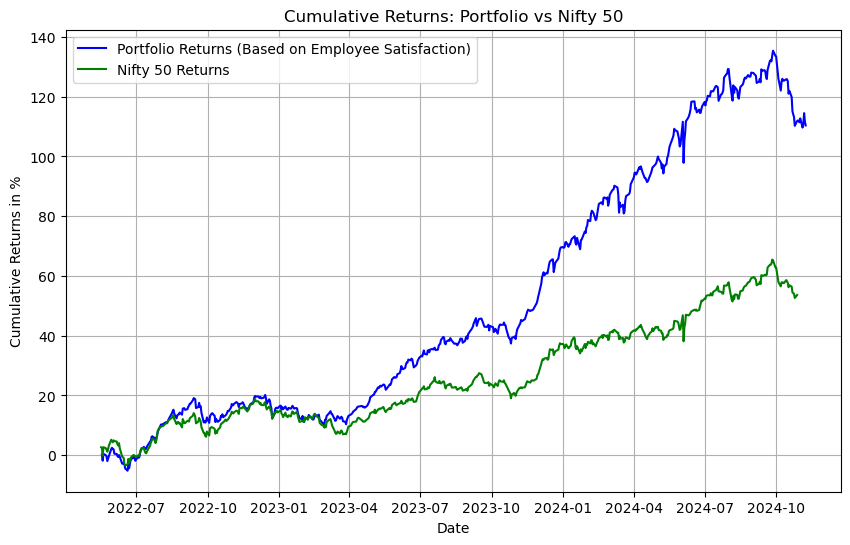

In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with employee satisfaction scores (assuming it's in the same folder)
satisfaction_data = pd.read_csv('top_50_companies_satisfaction_1.csv')

# Normalize employee satisfaction scores to create portfolio weights
satisfaction_data['Weight'] = satisfaction_data['Employee_Satisfaction_Score'] / satisfaction_data['Employee_Satisfaction_Score'].sum()

# Append ".NS" to each company ticker for correct fetching from Yahoo Finance
satisfaction_data['Company'] = satisfaction_data['Company'] + '.NS'

# Fetch historical data for the selected companies (last 5 years)
tickers = satisfaction_data['Company'].tolist()
data = yf.download(tickers, start="2022-05-15", end="2024-12-01")['Adj Close']

# Fetch historical data for Nifty 50 (^NSEI) and Nifty 100 (^CNX100)
#benchmark_tickers = []#, '^CNX100']
benchmark_data = yf.download('^NSEI', start="2022-05-15", end="2024-10-29")['Adj Close']

# Calculate daily returns for each company and benchmark indices
returns = data.pct_change().dropna()
nifty50_returns = benchmark_data.pct_change().dropna()
#nifty100_returns = benchmark_data['^CNX100'].pct_change().dropna()

# Calculate portfolio returns using the weights assigned based on employee satisfaction scores
weights = satisfaction_data['Weight'].values
portfolio_returns = (returns * weights).sum(axis=1)

# Calculate cumulative returns for portfolio, Nifty 50, and Nifty 100
cumulative_portfolio_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_nifty50_returns = (1 + nifty50_returns).cumprod() - 1
#cumulative_nifty100_returns = (1 + nifty100_returns).cumprod() - 1

# Plot the cumulative returns of the portfolio and benchmarks
plt.figure(figsize=(10, 6))
plt.plot(cumulative_portfolio_returns.index, cumulative_portfolio_returns*100, label='Portfolio Returns (Based on Employee Satisfaction)', color='blue')
plt.plot(cumulative_nifty50_returns.index, cumulative_nifty50_returns*100, label='Nifty 50 Returns', color='green')
#plt.plot(cumulative_nifty100_returns.index, cumulative_nifty100_returns, label='Nifty 100 Returns', color='red')

# Add labels and title
plt.title('Cumulative Returns: Portfolio vs Nifty 50')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns in %')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


Portfolio Returns:
Date
2022-05-18    0.002433
2022-05-19   -0.020875
2022-05-20    0.023245
2022-05-23   -0.004635
2022-05-24   -0.004561
                ...   
2024-11-04   -0.014536
2024-11-05    0.006162
2024-11-06    0.016798
2024-11-07   -0.013459
2024-11-08   -0.005796
Length: 614, dtype: float64

Benchmark Returns:
Date
2022-05-18   -0.001169
2022-05-19   -0.026533
2022-05-20    0.028891
2022-05-23   -0.003163
2022-05-24   -0.005523
                ...   
2024-11-04   -0.012714
2024-11-05    0.009083
2024-11-06    0.011182
2024-11-07   -0.011628
2024-11-08   -0.002512
Name: Adj Close, Length: 614, dtype: float64


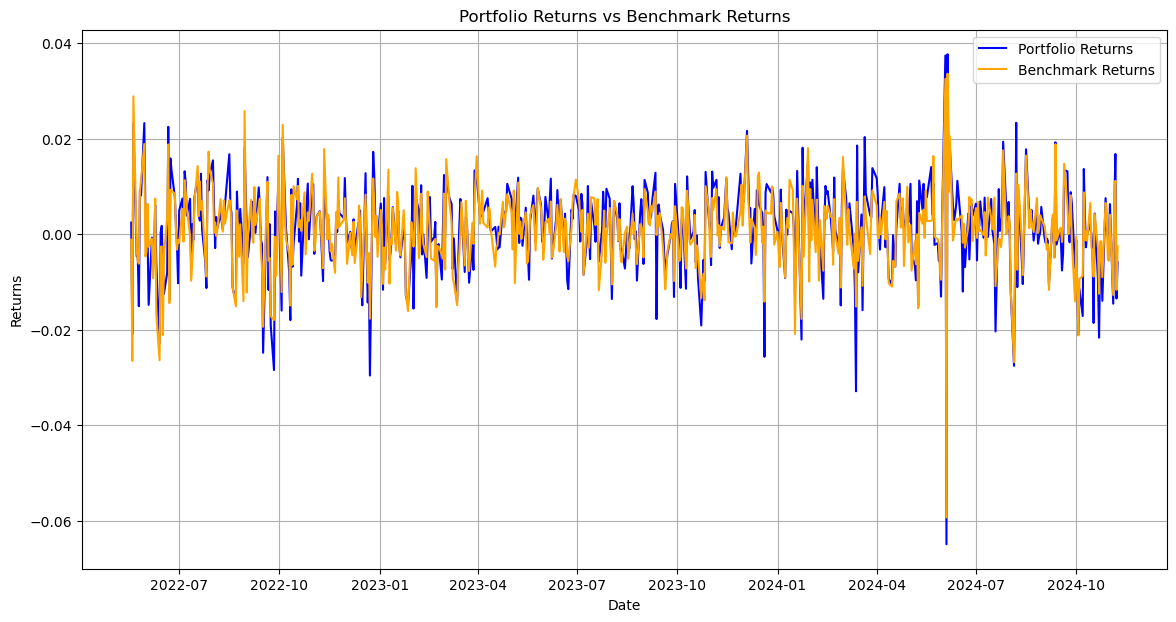


T-statistic: 1.1833582021060534
P-value: 0.8815516897459026

Hypothesis Testing:
Null Hypothesis (H0): Portfolio returns are greater than or equal to market returns (μ_portfolio > μ_market)
Alternative Hypothesis (Ha): Portfolio returns are less than market returns (μ_portfolio <= μ_market)
Fail to reject the null hypothesis: There is no significant evidence that portfolio returns are less than or equal to market returns.


In [36]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy import stats

# Fetch benchmark (market) data (Nifty 50 as an example)
benchmark_data = yf.download("^NSEI", start="2022-05-01", end="2024-12-29")['Adj Close']
benchmark_returns = benchmark_data.pct_change().dropna()

# Assuming 'portfolio_returns' is already defined as your portfolio's daily returns
# Ensure that portfolio_returns is aligned with benchmark_returns
portfolio_returns_aligned, benchmark_returns_aligned = portfolio_returns.align(benchmark_returns, join='inner')

# Display the returns
print("Portfolio Returns:")
print(portfolio_returns_aligned)
print("\nBenchmark Returns:")
print(benchmark_returns_aligned)

# Plot the portfolio and benchmark returns
plt.figure(figsize=(14, 7))
plt.plot(portfolio_returns_aligned.index, portfolio_returns_aligned, label='Portfolio Returns', color='blue')
plt.plot(benchmark_returns_aligned.index, benchmark_returns_aligned, label='Benchmark Returns', color='orange')
plt.title('Portfolio Returns vs Benchmark Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

# Perform a one-tailed t-test to compare the means of portfolio returns and benchmark returns
t_stat, p_value = stats.ttest_ind(portfolio_returns_aligned, benchmark_returns_aligned, alternative='less')

# Output the results
print(f"\nT-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Hypothesis testing result interpretation
alpha = 0.05  # Significance level

# Print exact hypotheses
print("\nHypothesis Testing:")
print("Null Hypothesis (H0): Portfolio returns are greater than or equal to market returns (μ_portfolio > μ_market)")
print("Alternative Hypothesis (Ha): Portfolio returns are less than market returns (μ_portfolio <= μ_market)")

# Interpretation of results
if p_value < alpha:
    print("Reject the null hypothesis: There is significant evidence that portfolio returns are less than market returns.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence that portfolio returns are less than or equal to market returns.")

## ADF Test for checking stationary/Non-Stationary

In [8]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(portfolio_returns)

# Print ADF statistic and p-value
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# Check for stationarity
if adf_test[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary. Differencing is needed.")


ADF Statistic: -25.532987715269236
p-value: 0.0
The time series is stationary.


## ACF & PACF plots to identify Arima Model

<Figure size 1000x600 with 0 Axes>

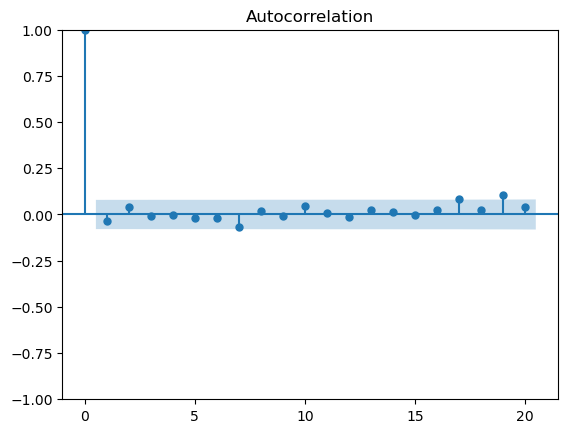

<Figure size 1000x600 with 0 Axes>

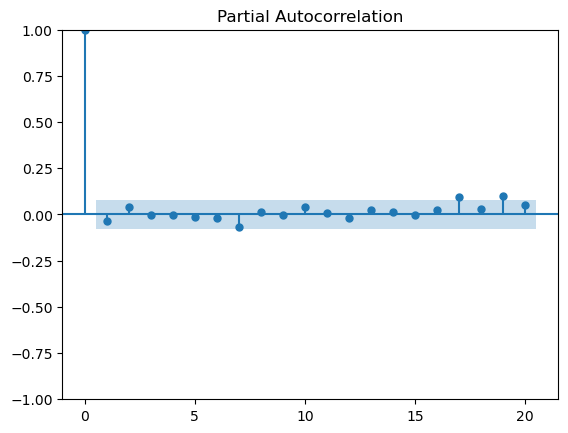

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF (Autocorrelation Function)
plt.figure(figsize=(10, 6))
plot_acf(portfolio_returns, lags=20)
plt.show()

# Plot PACF (Partial Autocorrelation Function)
plt.figure(figsize=(10, 6))
plot_pacf(portfolio_returns, lags=20)
plt.show()


## Arima Model

C:\Users\91702\SMU_anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91702\SMU_anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91702\SMU_anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91702\SMU_anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_predic

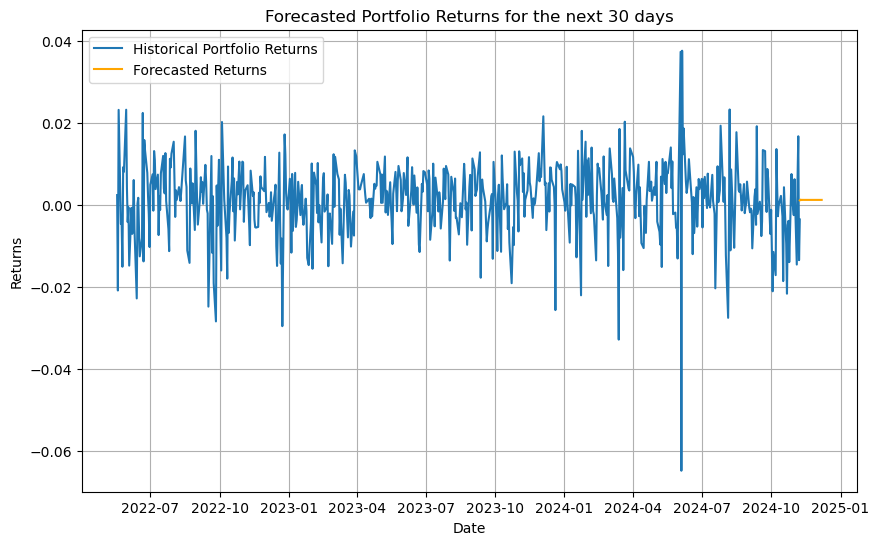

Forecasted Portfolio Returns for the next 30 days:
           Date  Forecasted_Returns
614 2024-11-08            0.001142
615 2024-11-09            0.001318
616 2024-11-10            0.001218
617 2024-11-11            0.001274
618 2024-11-12            0.001242
619 2024-11-13            0.001261
620 2024-11-14            0.001250
621 2024-11-15            0.001256
622 2024-11-16            0.001253
623 2024-11-17            0.001255
624 2024-11-18            0.001253
625 2024-11-19            0.001254
626 2024-11-20            0.001254
627 2024-11-21            0.001254
628 2024-11-22            0.001254
629 2024-11-23            0.001254
630 2024-11-24            0.001254
631 2024-11-25            0.001254
632 2024-11-26            0.001254
633 2024-11-27            0.001254
634 2024-11-28            0.001254
635 2024-11-29            0.001254
636 2024-11-30            0.001254
637 2024-12-01            0.001254
638 2024-12-02            0.001254
639 2024-12-03            0.001254
640

In [12]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Determine the ARIMA model parameters
p = 1  # Based on the PACF plot (1 significant lag)
d = 0  # Assume the series is stationary (can change based on ADF test)
q = 1  # Based on the ACF plot (1 significant lag)

# Fit the ARIMA model
model = ARIMA(portfolio_returns, order=(p, d, q))
model_fit = model.fit()

# Forecast the future portfolio returns
forecast_days = 30
forecast = model_fit.forecast(steps=forecast_days)

# Create a date range for the forecast period
forecast_dates = pd.date_range(portfolio_returns.index[-1], periods=forecast_days, freq='D')

# Convert forecast to a DataFrame for better readability
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Returns': forecast})

# Plot the historical and forecasted returns
plt.figure(figsize=(10, 6))
plt.plot(portfolio_returns.index, portfolio_returns, label='Historical Portfolio Returns')
plt.plot(forecast_df['Date'], forecast_df['Forecasted_Returns'], label='Forecasted Returns', color='orange')

# Add labels and title
plt.title(f'Forecasted Portfolio Returns for the next {forecast_days} days')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

# Print the forecasted returns
print(f"Forecasted Portfolio Returns for the next {forecast_days} days:\n", forecast_df)

# Print why we chose ARIMA(1, 0, 1)
print(f"\nARIMA(1, 0, 1) was selected based on the following reasoning:\n"
      f"1. The ACF plot shows significant autocorrelation at lag 1, suggesting q = 1.\n"
      f"2. The PACF plot shows significant partial autocorrelation at lag 1, suggesting p = 1.\n"
      f"3. The ADF test showed the series is stationary, so d = 0 (no differencing needed).")


Arima not working so proceeding with LSTM

## LSTM Model predictions

[*********************100%%**********************]  50 of 50 completed
C:\Users\91702\SMU_anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.1557 - val_loss: 0.0181
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0152 - val_loss: 0.0179
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0099 - val_loss: 0.0143
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0072 - val_loss: 0.0139
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0058 - val_loss: 0.0138
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0059 - val_loss: 0.0138
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0056 - val_loss: 0.0138
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0071 - val_loss: 0.0138
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0064 - val_loss: 0.0138
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0066 - val_loss: 0.0139
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0063 - val_loss: 0.0139
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0

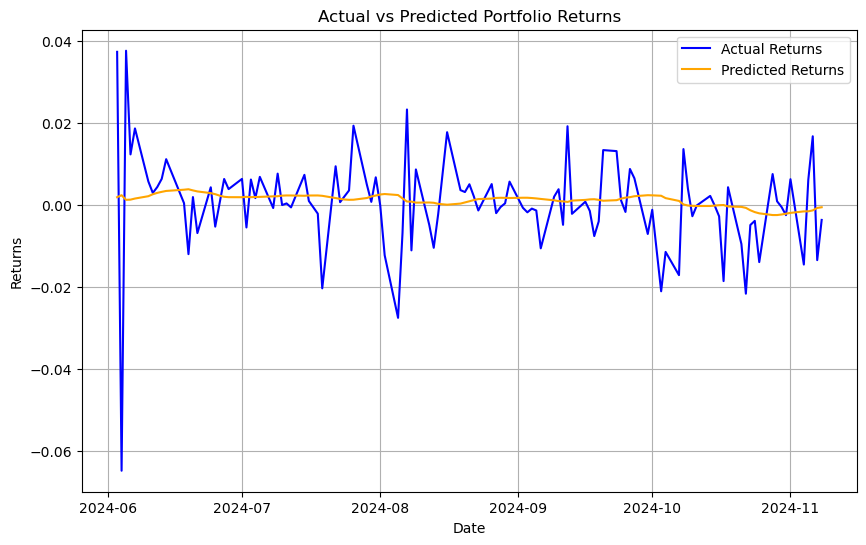

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf

# Load the CSV file with employee satisfaction scores (assuming it's in the same folder)
satisfaction_data = pd.read_csv('top_50_companies_satisfaction_1.csv')

# Normalize employee satisfaction scores to create portfolio weights
satisfaction_data['Weight'] = satisfaction_data['Employee_Satisfaction_Score'] / satisfaction_data['Employee_Satisfaction_Score'].sum()

# Append ".NS" to each company ticker for correct fetching from Yahoo Finance
satisfaction_data['Company'] = satisfaction_data['Company'] + '.NS'

# Fetch historical data for the selected companies (last 5 years)
tickers = satisfaction_data['Company'].tolist()
data = yf.download(tickers, start="2022-05-15", end="2024-12-01")['Adj Close']

# Calculate portfolio returns using the weights assigned based on employee satisfaction scores
weights = satisfaction_data['Weight'].values
returns = data.pct_change().dropna()
portfolio_returns = (returns * weights).sum(axis=1)

# Prepare data for LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(portfolio_returns.values.reshape(-1, 1))

# Define time step (how many previous days to look at to predict the next day)
time_step = 60
X, y = [], []
for i in range(time_step, len(scaled_data)):
    X.append(scaled_data[i - time_step:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# Reshape X to be suitable for LSTM input (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the testing set
test_predictions = model.predict(X_test)
scaled_test_predictions = scaler.inverse_transform(test_predictions)
scaled_actual_returns = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compare actual returns with predicted returns
forecast_dates = portfolio_returns.index[-len(y_test):]
results_df = pd.DataFrame({
    'Date': forecast_dates,
    'Actual Returns': scaled_actual_returns.flatten(),
    'Predicted Returns': scaled_test_predictions.flatten()
})

# Calculate and add error term to results_df
results_df['Error'] = results_df['Actual Returns'] - results_df['Predicted Returns']

# Print the predicted and actual returns along with the errors
print(results_df)

# Plot the actual and predicted returns
plt.figure(figsize=(10, 6))
plt.plot(results_df['Date'], results_df['Actual Returns'], label='Actual Returns', color='blue')
plt.plot(results_df['Date'], results_df['Predicted Returns'], label='Predicted Returns', color='orange')
plt.title('Actual vs Predicted Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()


## Performance Metrics (Sharpe ratio)

In [17]:
import numpy as np

# Assuming 'portfolio_returns' is a pandas Series of daily portfolio returns
# 'risk_free_rate' is the annual risk-free rate (example: 6% annualized)
# Convert the annual risk-free rate to a daily rate (assuming 252 trading days per year)
annual_risk_free_rate = 0.06  # Example: 6% annual rate
trading_days = 252  # Assume 252 trading days in a year
daily_risk_free_rate = annual_risk_free_rate / trading_days

# Sharpe Ratio
def sharpe_ratio(returns, risk_free_rate, trading_days=252):
    excess_returns = returns - risk_free_rate  # Excess returns over risk-free rate
    sharpe = (excess_returns.mean() / excess_returns.std()) * np.sqrt(trading_days)  # Annualized Sharpe Ratio
    return sharpe

# Sortino Ratio (only downside deviation)
# def sortino_ratio(returns, risk_free_rate, trading_days=252):
#     excess_returns = returns - risk_free_rate  # Excess returns over risk-free rate
#     downside_returns = returns[returns < risk_free_rate]  # Only consider downside returns
#     downside_std = downside_returns.std() * np.sqrt(trading_days)  # Annualized downside standard deviation
#     sortino = (excess_returns.mean() / downside_std)  # Annualized Sortino Ratio
#     return sortino

# Example usage with 'portfolio_returns' (your portfolio's daily returns as a pandas Series)
sharpe = sharpe_ratio(portfolio_returns, daily_risk_free_rate, trading_days)
#sortino = sortino_ratio(portfolio_returns, daily_risk_free_rate, trading_days)

print(f"Annualized Sharpe Ratio: {sharpe}")
#print(f"Annualized Sortino Ratio: {sortino}")


Annualized Sharpe Ratio: 1.7888509044288152


## Treynor Ratio and Jensen's Alpha

In [19]:
import numpy as np
import yfinance as yf

# Assuming 'portfolio_returns' is your portfolio's daily returns series
# Fetch Nifty 50 data (or another benchmark) to get benchmark returns
benchmark_data = yf.download("^NSEI", start="2022-05-01", end="2024-12-29")['Adj Close']
benchmark_returns = benchmark_data.pct_change().dropna()

# Align both series to ensure they have the same length
portfolio_returns_aligned, benchmark_returns_aligned = portfolio_returns.align(benchmark_returns, join='inner')

# Define risk-free rate
annual_risk_free_rate = 0.06
daily_risk_free_rate = annual_risk_free_rate / 252  # Assuming 252 trading days

# Annualize factor
annualize_factor = np.sqrt(252)  # For Treynor Ratio
days_in_year = 252               # For Jensen's Alpha

# Treynor Ratio calculation
def treynor_ratio(portfolio_returns, benchmark_returns, risk_free_rate):
    cov_matrix = np.cov(portfolio_returns, benchmark_returns)
    beta = cov_matrix[0, 1] / cov_matrix[1, 1]
    daily_treynor = (portfolio_returns.mean() - risk_free_rate) / beta
    annual_treynor = daily_treynor * annualize_factor
    return annual_treynor

# Jensen's Alpha calculation
def jensens_alpha(portfolio_returns, benchmark_returns, risk_free_rate):
    cov_matrix = np.cov(portfolio_returns, benchmark_returns)
    beta = cov_matrix[0, 1] / cov_matrix[1, 1]
    expected_portfolio_return = risk_free_rate + beta * (benchmark_returns.mean() - risk_free_rate)
    daily_alpha = portfolio_returns.mean() - expected_portfolio_return
    annual_alpha = daily_alpha * days_in_year
    return annual_alpha

# Calculate and print Treynor Ratio and Jensen's Alpha
treynor = treynor_ratio(portfolio_returns_aligned, benchmark_returns_aligned, daily_risk_free_rate)
alpha = jensens_alpha(portfolio_returns_aligned, benchmark_returns_aligned, daily_risk_free_rate)

print(f"Annualized Treynor Ratio: {treynor}")
print(f"Annualized Jensen's Alpha: {alpha}")


[*********************100%%**********************]  1 of 1 completed

Annualized Treynor Ratio: 0.01670214410705484
Annualized Jensen's Alpha: 0.14933975824335363


## Summary

## Sharpe Ratio - 1.8
## Jensen's Alpha - 15%
## Treynor Ratio - 0.017 